In [1576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.model_selection import KFold, StratifiedKFold
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [1577]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [1578]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\TRAIN.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\TEST.csv')
sample = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\sample_submission.csv')

In [1579]:
idx = test.Index

In [1580]:
train.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [1581]:
test.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [1582]:
sample.head()

,Index,Rented Bike Count
0,0,886
1,1,761
2,2,524
3,3,294
4,4,241


In [1583]:
train.columns = ['Index','Date','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_Day','Rented_Bike_Count']
test.columns = ['Index','Date','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_Day']

In [1584]:
train.describe()

,Index,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Rented_Bike_Count
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,11.500000,13.154778,58.164960,1.785708,1421.082480,4.323905,0.590294,0.152645,0.076024,689.143203
std,2030.107879,6.922679,12.997927,20.637447,1.053112,613.169137,14.178857,0.893909,1.165239,0.403487,652.151786
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,1757.750000,5.750000,1.800000,42.000000,1.000000,918.750000,-6.700000,0.000000,0.000000,0.000000,189.750000
50%,3515.500000,11.500000,15.500000,57.000000,1.600000,1665.000000,6.900000,0.020000,0.000000,0.000000,444.000000
75%,5273.250000,17.250000,24.000000,74.000000,2.400000,1996.000000,16.500000,0.950000,0.000000,0.000000,1035.000000
max,7031.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,3556.000000


In [1585]:
test.describe()

,Index,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,1728.000000,1728.00000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,863.500000,11.50000,11.776620,58.475694,1.477488,1500.892361,3.056076,0.482905,0.132581,0.071181
std,498.974949,6.92419,5.856291,19.206298,0.924784,583.871138,6.733800,0.751881,0.962979,0.551917
min,0.000000,0.00000,-3.000000,13.000000,0.000000,33.000000,-19.000000,0.000000,0.000000,0.000000
25%,431.750000,5.75000,7.375000,43.000000,0.800000,1015.000000,-0.300000,0.000000,0.000000,0.000000
50%,863.500000,11.50000,11.600000,59.000000,1.300000,1805.000000,3.600000,0.000000,0.000000,0.000000
75%,1295.250000,17.25000,16.500000,74.000000,2.000000,2000.000000,7.400000,0.810000,0.000000,0.000000
max,1727.000000,23.00000,26.600000,97.000000,5.700000,2000.000000,18.100000,2.930000,18.000000,8.800000


In [1586]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 15 columns):
Index                    7032 non-null int64
Date                     7032 non-null object
Hour                     7032 non-null int64
Temperature              7032 non-null float64
Humidity                 7032 non-null int64
Wind_speed               7032 non-null float64
Visibility               7032 non-null int64
Dew_point_temperature    7032 non-null float64
Solar_Radiation          7032 non-null float64
Rainfall                 7032 non-null float64
Snowfall                 7032 non-null float64
Seasons                  7032 non-null object
Holiday                  7032 non-null object
Functioning_Day          7032 non-null object
Rented_Bike_Count        7032 non-null int64
dtypes: float64(6), int64(5), object(4)
memory usage: 824.1+ KB


In [1587]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 14 columns):
Index                    1728 non-null int64
Date                     1728 non-null object
Hour                     1728 non-null int64
Temperature              1728 non-null float64
Humidity                 1728 non-null int64
Wind_speed               1728 non-null float64
Visibility               1728 non-null int64
Dew_point_temperature    1728 non-null float64
Solar_Radiation          1728 non-null float64
Rainfall                 1728 non-null float64
Snowfall                 1728 non-null float64
Seasons                  1728 non-null object
Holiday                  1728 non-null object
Functioning_Day          1728 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 189.1+ KB


#### Target analysis

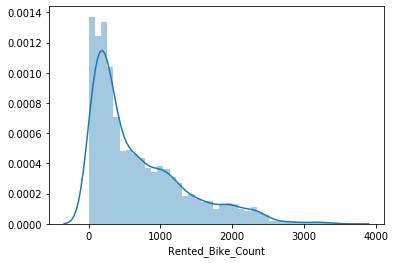

In [1588]:
sns.distplot(train.Rented_Bike_Count)

In [1589]:
train.Rented_Bike_Count.skew(), train.Rented_Bike_Count.kurt()

(1.2658926650307742, 1.099637910278993)

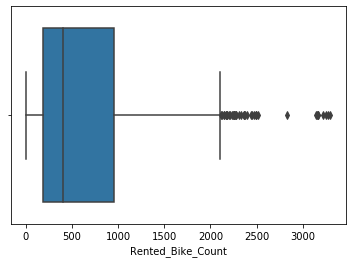

In [1593]:
sns.boxplot(train.Rented_Bike_Count)

In [1591]:
for i in train[train.Rented_Bike_Count>2090].Seasons.index:
    if (train.loc[i,'Seasons'] != 'Autumn'):
        train.loc[i,'Seasons'] = 'x'
    else:
        pass
    
#train.drop(index = train[train.Rented_Bike_Count>2090].Seasons.index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [1592]:
train.drop(index = train[train.Seasons=='x'].index,inplace=True)
train.reset_index(drop=True,inplace=True)

#### Feature analysis

#### Date

In [1594]:
train.Date.nunique(),test.Date.nunique()

(293, 72)

In [1595]:
train.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Rented_Bike_Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [1596]:
test.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [1597]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

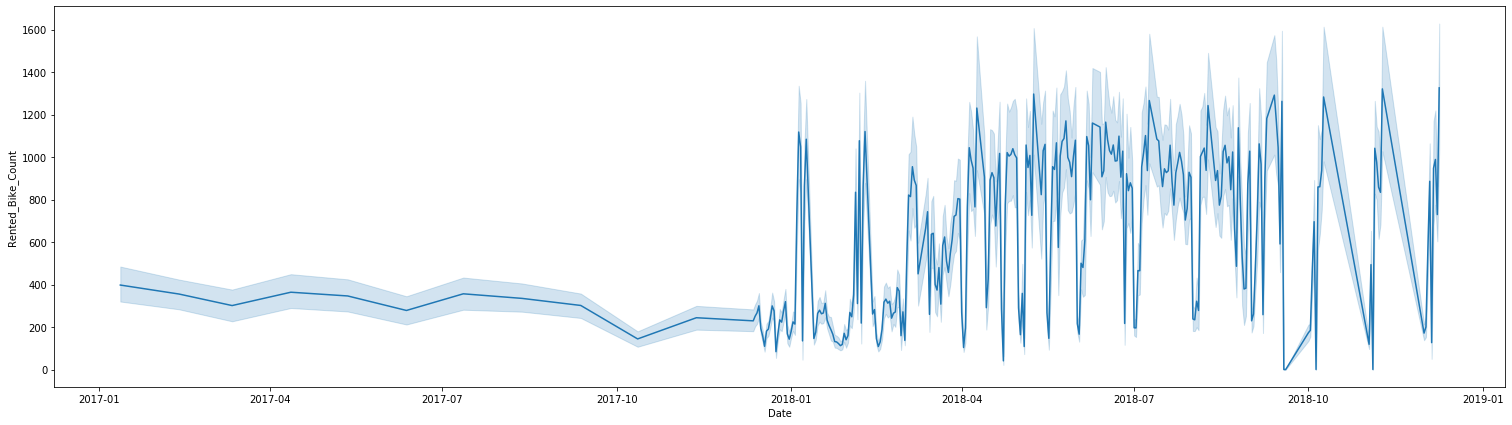

In [1598]:
plt.figure(figsize = (26,7))
sns.lineplot(train.Date,train.Rented_Bike_Count)

#### Hour

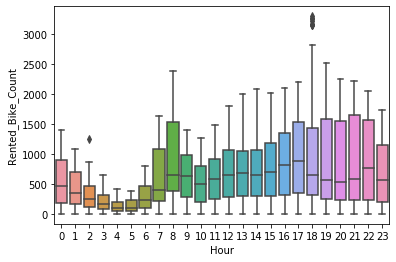

In [1599]:
sns.boxplot(train.Hour,train.Rented_Bike_Count)

#### Temperature

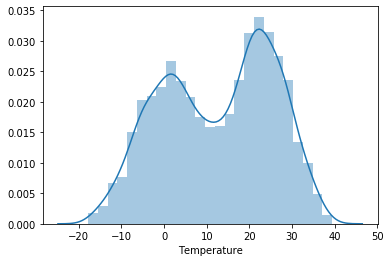

In [1600]:
sns.distplot(train.Temperature)

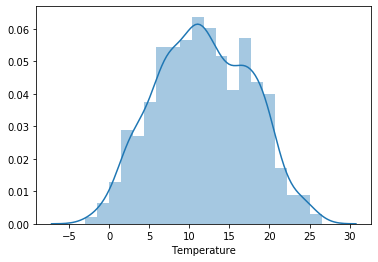

In [1601]:
sns.distplot(test.Temperature)

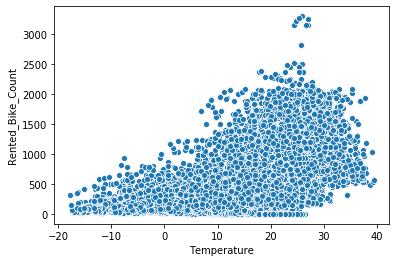

In [1602]:
sns.scatterplot(train.Temperature,train.Rented_Bike_Count)

#### Humidity

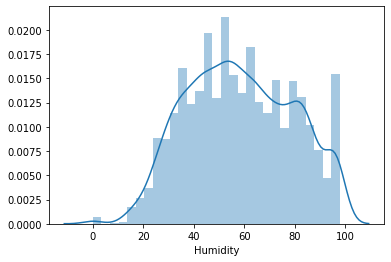

In [1603]:
sns.distplot(train.Humidity)

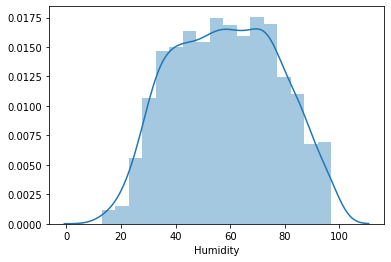

In [1604]:
sns.distplot(test.Humidity)

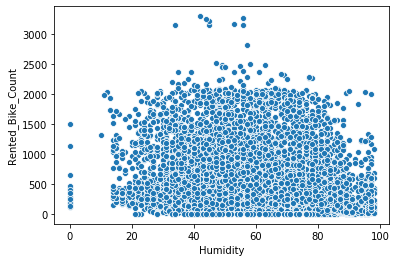

In [1605]:
sns.scatterplot(train.Humidity,train.Rented_Bike_Count)

In [1606]:
#train.drop(train[train.Humidity==0].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

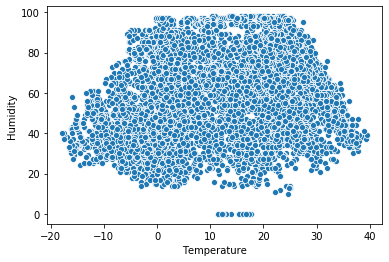

In [1607]:
sns.scatterplot(train.Temperature,train.Humidity)

#### Wind Speed

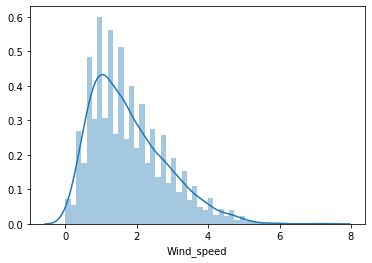

In [1608]:
sns.distplot(train.Wind_speed) ##take log1p

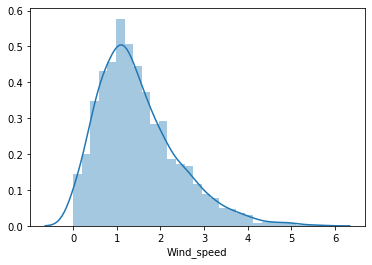

In [1609]:
sns.distplot(test.Wind_speed)

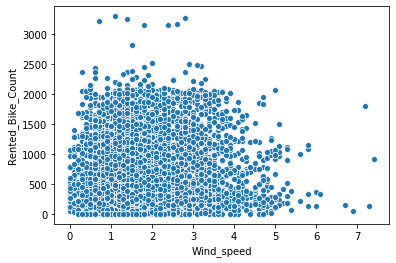

In [1610]:
sns.scatterplot(train.Wind_speed,train.Rented_Bike_Count)

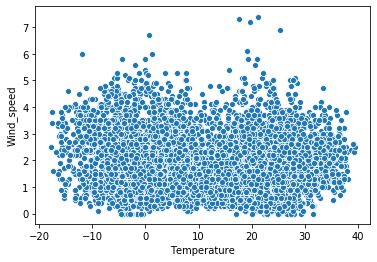

In [1611]:
sns.scatterplot(train.Temperature,train.Wind_speed)

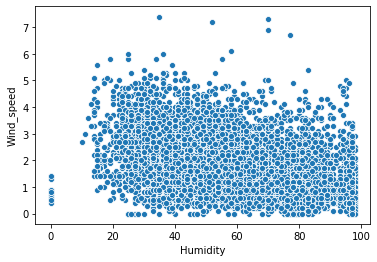

In [1612]:
sns.scatterplot(train.Humidity,train.Wind_speed)

#### Visibility

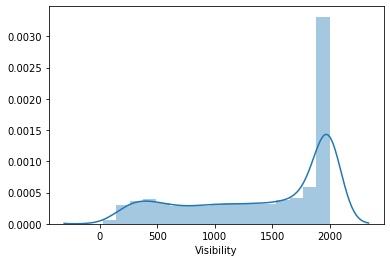

In [1613]:
sns.distplot(train.Visibility)

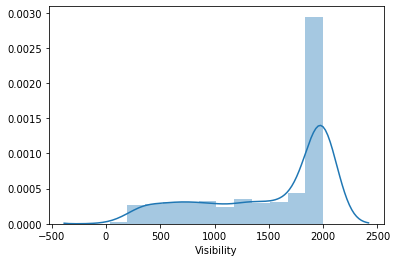

In [1614]:
sns.distplot(test.Visibility)

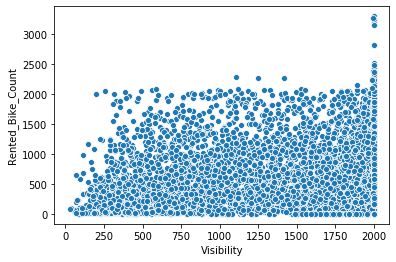

In [1615]:
sns.scatterplot(train.Visibility,train.Rented_Bike_Count)

#### Dew point temperature

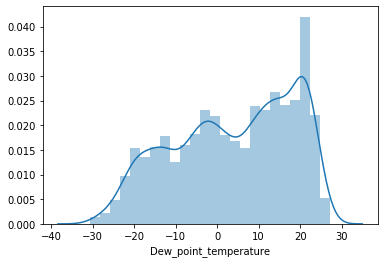

In [1616]:
sns.distplot(train.Dew_point_temperature)

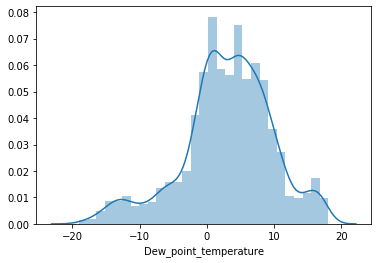

In [1617]:
sns.distplot(test.Dew_point_temperature)

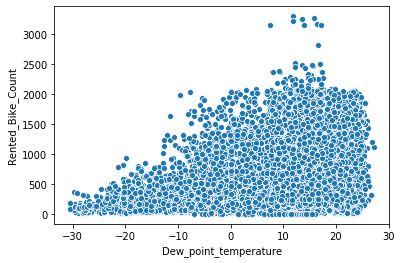

In [1618]:
sns.scatterplot(train.Dew_point_temperature,train.Rented_Bike_Count)

#### Solar radiation

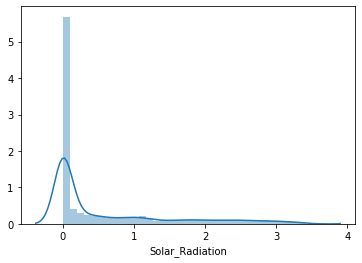

In [1619]:
sns.distplot(train.Solar_Radiation)

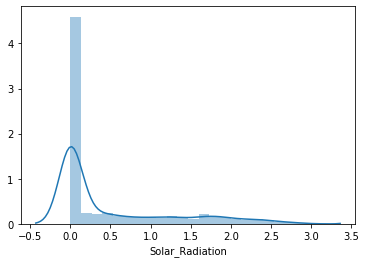

In [1620]:
sns.distplot(test.Solar_Radiation)

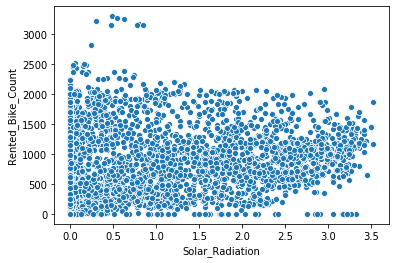

In [1621]:
sns.scatterplot(train.Solar_Radiation,train.Rented_Bike_Count)

#### Rainfall

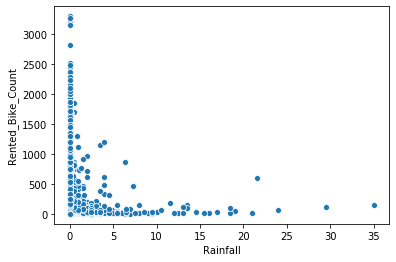

In [1622]:
sns.scatterplot(train.Rainfall,train.Rented_Bike_Count)

#### Snowfall

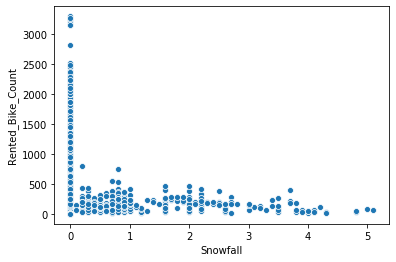

In [1623]:
sns.scatterplot(train.Snowfall,train.Rented_Bike_Count)

#### Season

In [1624]:
train.Seasons.value_counts()

Winter    2160
Spring    2133
Summer    1984
Autumn     456
Name: Seasons, dtype: int64

In [1625]:
test.Seasons.value_counts()

Autumn    1728
Name: Seasons, dtype: int64

#### Holiday

In [1626]:
train.Holiday.value_counts()

No Holiday    6425
Holiday        308
Name: Holiday, dtype: int64

In [1627]:
test.Holiday.value_counts()

No Holiday    1608
Holiday        120
Name: Holiday, dtype: int64

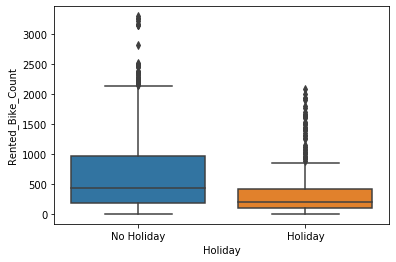

In [1628]:
sns.boxplot(train.Holiday,train.Rented_Bike_Count)

#### Functioning day

In [1629]:
train.Functioning_Day.value_counts()

Yes    6637
No       96
Name: Functioning_Day, dtype: int64

In [1630]:
test.Functioning_Day.value_counts()

Yes    1529
No      199
Name: Functioning_Day, dtype: int64

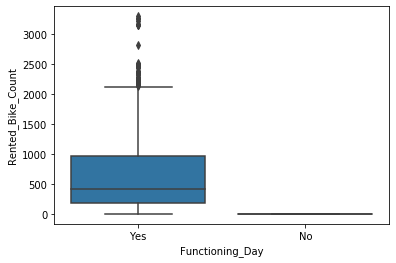

In [1631]:
sns.boxplot(train.Functioning_Day,train.Rented_Bike_Count)

### Engineering Features

In [1632]:
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)

In [1633]:
df.head()

,Date,Dew_point_temperature,Functioning_Day,Holiday,Hour,Humidity,Index,Rainfall,Rented_Bike_Count,Seasons,Snowfall,Solar_Radiation,Temperature,Visibility,Wind_speed
0,2017-01-12,-17.6,Yes,No Holiday,0,37,0,0.0,254.0,Winter,0.0,0.0,-5.2,2000,2.2
1,2017-01-12,-17.6,Yes,No Holiday,1,38,1,0.0,204.0,Winter,0.0,0.0,-5.5,2000,0.8
2,2017-01-12,-17.7,Yes,No Holiday,2,39,2,0.0,173.0,Winter,0.0,0.0,-6.0,2000,1.0
3,2017-01-12,-17.6,Yes,No Holiday,3,40,3,0.0,107.0,Winter,0.0,0.0,-6.2,2000,0.9
4,2017-01-12,-18.6,Yes,No Holiday,4,36,4,0.0,78.0,Winter,0.0,0.0,-6.0,2000,2.3


c1 = -42.379
c2= 2.04901523
c3 = 10.14333127
c4 = -0.22475541
c5 = -6.83783*(10**-3)
c6 = -5.481717*(10**-2)
c7 = 1.22874*(10**-3)
c8 = 8.5282*(10**-4)
c9 = -1.99*(10**-6)

df.Temperature = (df.Temperature*1.8)+32
df.Dew_point_temperature = (df.Dew_point_temperature*1.8)+32

df['HI'] = c1+(c2*df.Temperature) +(c3*df.Humidity)+(c4*df.Temperature*train.Humidity) +(c5*(df.Temperature**2))+(c6*(df.Humidity**2))+(c7*(df.Temperature**2)*df.Humidity)+(c8*train.Temperature*(df.Humidity**2))+(c9*(df.Temperature**2)*(df.Humidity**2))

df['cpa']=1.0189134*(10**3)- (0.3783636*df.Temperature)+(1.9843397*(10**-4)*(df.Temperature**2))+((4.2399242*(10**-7)*(df.Temperature**3)))-((3.7632*(10**-10))*(df.Temperature**4))


In [1634]:
df['month'] = df.Date.dt.month
df['weekday'] = df.Date.dt.weekday
df['week_of_year'] = df.Date.dt.weekofyear
df['day'] = df.Date.dt.day
df['day_of_year']=df.Date.dt.dayofyear
df['quarter'] = df.Date.dt.quarter
#df['day_of_week'] = df.Date.dt.dayofweek

In [1635]:
df['Temp_diff'] = abs(df.Temperature) - abs(df.Dew_point_temperature)
df['Total_temp'] = df.Temperature + df.Dew_point_temperature


In [1636]:
df['year'] = df.Date.dt.year

In [1637]:
df['Dew_Temp_ideal'] = df.Temperature -((100-df.Humidity)/5)
#df['Vap_Pres'] = 0.611 * np.exp(5423 *((1/273)-(1/df.Dew_point_temperature)))
#df['Sat_Vap_Pres'] = 0.611 * np.exp(5423 *((1/273)-(1/df.Temperature)))
#df['calc_rel_humidity'] = df['Vap_Pres']/df['Sat_Vap_Pres']

In [1638]:
#df['mon_date'] = str(df.Date.dt.year) + str(df.Date.dt.month)

In [1639]:
#df['mon_mean_temp'] = df.groupby(['year','month','day','Hour'])['Temperature'].transform('mean')
#df['mon_mean_Dew_temp'] = df.groupby(['year','month','day','Hour'])['Dew_point_temperature'].transform('mean')
#df['mon_mean_Humidity'] = df.groupby(['year','month','day','Hour'])['Humidity'].transform('mean')

df['mean_Visibility'] = df.groupby(['Humidity'])['Temperature'].transform('mean')
df['mean_Wind_speed'] = df.groupby(['Humidity'])['Wind_speed'].transform('mean')
df['mean_Solar_Radiation'] = df.groupby(['Humidity'])['Solar_Radiation'].transform('mean')

In [1640]:
df['rain_snow_falldiff'] = df.Rainfall - df.Snowfall

In [1641]:
df.Wind_speed = np.log1p(df.Wind_speed)

df['temp_change'] = df.Temperature - df.Temperature.shift(1)
df['temp_change'] = df['temp_change'].fillna(0)

df['dew_temp_change'] = df.Dew_point_temperature - df.Dew_point_temperature.shift(1)
df['dew_temp_change'] = df['dew_temp_change'].fillna(0)

In [1642]:
le=LabelEncoder()
df['Functioning_Day'] = le.fit_transform(df['Functioning_Day'])

df['Holiday'] = le.fit_transform(df['Holiday'])

#df = pd.concat([df,pd.get_dummies(df[['Humidity']].astype('category'))],axis=1)

In [1643]:
train = df.iloc[:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [1644]:
train.head()

,Date,Dew_point_temperature,Functioning_Day,Holiday,Hour,Humidity,Index,Rainfall,Rented_Bike_Count,Seasons,Snowfall,Solar_Radiation,Temperature,Visibility,Wind_speed,month,weekday,week_of_year,day,day_of_year,quarter,Temp_diff,Total_temp,year,Dew_Temp_ideal,mean_Visibility,mean_Wind_speed,mean_Solar_Radiation,rain_snow_falldiff
0,2017-01-12,-17.6,1,1,0,37,0,0.0,254.0,Winter,0.0,0.0,-5.2,2000,1.163151,1,3,2,12,12,1,-12.4,-22.8,2017,-17.8,9.095614,2.059649,1.069912,0.0
1,2017-01-12,-17.6,1,1,1,38,1,0.0,204.0,Winter,0.0,0.0,-5.5,2000,0.587787,1,3,2,12,12,1,-12.1,-23.1,2017,-17.9,9.803448,2.092241,1.043103,0.0
2,2017-01-12,-17.7,1,1,2,39,2,0.0,173.0,Winter,0.0,0.0,-6.0,2000,0.693147,1,3,2,12,12,1,-11.7,-23.7,2017,-18.2,10.589922,1.848837,0.948682,0.0
3,2017-01-12,-17.6,1,1,3,40,3,0.0,107.0,Winter,0.0,0.0,-6.2,2000,0.641854,1,3,2,12,12,1,-11.4,-23.8,2017,-18.2,9.400000,2.034677,0.982661,0.0
4,2017-01-12,-18.6,1,1,4,36,4,0.0,78.0,Winter,0.0,0.0,-6.0,2000,1.193922,1,3,2,12,12,1,-12.6,-24.6,2017,-18.8,10.185981,2.542056,1.256075,0.0


In [1645]:
label = train.Rented_Bike_Count

train.drop(columns=['Date','Index','Seasons','Rented_Bike_Count','year'],inplace=True)
test.drop(columns=['Date','Index','Seasons','Rented_Bike_Count','year'],inplace=True)

In [1646]:
train.shape,label.shape,test.shape

((6733, 24), (6733,), (1728, 24))

### Modelling

In [1647]:
def func(m,train,label,test,cv,rnd_st):
    tr=[]
    te=[]
    pred = pd.DataFrame(np.zeros(shape=(test.shape[0],cv)))
    splitends = KFold(n_splits=cv,random_state=rnd_st,shuffle=True)
    
    for i,(tr_index,te_index) in (enumerate(splitends.split(train,label))):
        xtrain,xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain,ytest = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict(xtrain)
        te_pred = m.predict(xtest)
        
        tr.append(np.sqrt(mean_squared_error(ytrain,tr_pred)))
        te.append(np.sqrt(mean_squared_error(ytest,te_pred)))
        print(np.sqrt(mean_squared_error(ytrain,tr_pred)),'\t\t\t\t',np.sqrt(mean_squared_error(ytest,te_pred)))
        
        pred.iloc[:,i] = m.predict(test)
    pd.Series(m.feature_importances_,index=train.columns).sort_values().plot.barh()
    print(np.mean(tr),'\t\t',np.mean(te))    
    return pred

In [1648]:
seed = 11009

20.009185597426793 				 132.5349427255094
20.03848506639639 				 153.96155240285267
19.233576981857258 				 165.15488503684293
19.519267503141265 				 157.67998537984042
19.849155737861953 				 167.57537087994024
19.72993417733673 		 155.38134728499713


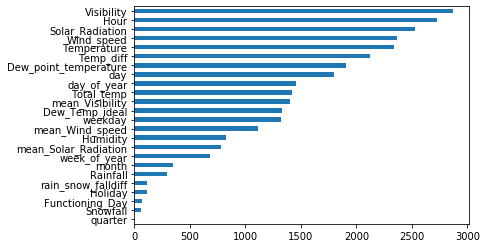

In [1649]:
predicted = func(lgb.LGBMRegressor(n_estimators=1000,random_state=seed),train,label,test,5,seed)

In [1650]:
predicted.head()

,0,1,2,3,4
0,758.911800,758.999883,862.825995,754.075237,764.137014
1,605.506313,640.532573,725.174970,638.185580,632.027315
2,423.861796,419.475069,510.039501,332.671368,389.864330
3,331.211938,325.119729,242.015545,258.555835,339.344227
4,284.610150,293.360508,278.476162,249.049613,235.691119


In [1651]:
ans = np.mean(predicted,axis=1)

In [1652]:
ans.head()

0    779.789986
1    648.285350
2    415.182413
3    299.249455
4    268.237511
dtype: float64

In [1653]:
final = ans.astype('int')

In [1654]:
sample = pd.DataFrame(np.zeros(shape=(test.shape[0],2)),columns=['Index','Rented Bike Count'])
sample['Rented Bike Count'] = final
sample.Index = idx

In [1655]:
sample['Rented Bike Count'] = sample['Rented Bike Count'].apply(lambda x: x if x>=0 else 0)

In [1656]:
sample.shape

(1728, 2)

In [1657]:
sample.to_csv('predict10.csv',index=False)